# О возникновении силы тяги в системе вращающихся зарядов

In [64]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    double tlag(long double x, long double y, long double z, long double t, 
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc,
                long double R, long double omega, long double alpha)
    
    long double tlag_test(long double x, long double y, long double z, long double t1, long double t2, 
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
               long double xc, long double yc, long double zc,
               long double R, long double omega, long double alpha)

    # отношение радиуса Лиенара Вихерта к радиусу
    long double klw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    # Радиус Лиенара Вихерта
    long double Rlw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    long double philw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
             long double q,
             long double * A_x, long double * A_y, long double * A_z,
             long double xc, long double yc, long double zc, long double R, long double omega, long double alpha
           )
    
    void electr_magnet(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double * E_x, long double * E_y, long double * E_z, long double * B_x, long double * B_y, long double * B_z,
                       long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)

    void cset_c(long double _c)
    void cset_timespan_Epsilon(long double _eps)
    long double cget_c()
    long double cget_timespan_Epsilon()

#sgs 
import numpy as np
cdef long double c# = np.float128(1)
cdef long double timespan_Epsilon = np.float128(1.0e-8)

cdef long double R_r = np.float128(1)
cdef long double R_l = np.float128(1)
cdef long double S = np.float128(0.005)

# centers of circles
cr = ( S/2+R_r, np.float128(0), np.float128(0))
cl = (-S/2-R_l, np.float128(0), np.float128(0))

cdef long double xc_l = cl[0]
cdef long double xc_r = cr[0]

cdef long double yc_l = cl[1]
cdef long double yc_r = cr[1]

cdef long double zc_l = cl[2]
cdef long double zc_r = cr[2]

cdef long double sx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = xc + R*np.cos(current_angle)
    return result
cdef long double sy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = yc + R*np.sin(current_angle)
    return result
cdef long double sz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    result = zc
    return result

cdef long double vx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = -omega*R*np.sin(current_angle)
    return result
cdef long double vy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = omega*R*np.cos(current_angle)
    return result
cdef long double vz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    result = 0
    return result


cdef long double wx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = -omega*omega*R*np.cos(current_angle)
    return result
cdef long double wy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*omega*R*np.sin(current_angle)
    return result
cdef long double wz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    result = 0
    return result

def R_lw(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t

    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))

    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    cdef long double r_lw = Rlw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, Xc, Yc, Zc, Rc, Omega, Alpha)

    return r_lw

def phi_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t

    cdef long double q_ = q
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha

    cdef long double philw_ = philw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, q_, Xc, Yc, Zc, Rc, Omega, Alpha)

    return philw_


def A_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    cdef long double q_ = q
    
    cdef long double A_x
    cdef long double A_y
    cdef long double A_z
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha

    Alw(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz,
                  q_,
                  &A_x, &A_y, &A_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (A_x, A_y, A_z)

def EB_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    cdef long double q_ = q
    
    cdef long double E_x
    cdef long double E_y
    cdef long double E_z
    cdef long double B_x
    cdef long double B_y
    cdef long double B_z
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    electr_magnet(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
                  q_,
                  &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (E_x, E_y, E_z, B_x, B_y, B_z)

def t_lag(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    cdef long double q = 1
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    
    # расчет итерациями запаздывающего момента
    cdef long double lag = tlag(Xa, Ya, Za, ta,
                           sx, sy, sz, vx, vy, vz,
                           Xc, Yc, Zc, Rc, Omega, Alpha)
    return lag


def t_lag_test(x, y, z, t1, t2, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t1
    cdef long double tq = t2
    cdef long double q = 1
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    
    # расчет итерациями запаздывающего момента
    cdef long double tst = tlag_test(Xa, Ya, Za, ta, tq,
                                sx, sy, sz,
                                Xc, Yc, Zc, Rc, Omega, Alpha)
    return tst



def calc_sum_Fy_t(N, S, R_l, R_r, t_i,
                  omega,
                  alpha0_l = np.float128(0),
                  alpha0_r = np.float128(0),
                  to_animate = False,
                  to_log = False):
    
    cdef int n = N
    cdef long double sign_a
    cdef long double sign_q
    
    cdef long double Alpha_l
    cdef long double Alpha_r
    
    cdef long double current_angle_l
    cdef long double current_angle_r
    
    cdef long double Omega_l = + omega
    cdef long double Omega_r = - omega
    
    cdef long double Xa, Ya, Za
    cdef long double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef long double Fx_l = 0.0
    cdef long double Fy_l = 0.0
    cdef long double Fx_r = 0.0
    cdef long double Fy_r = 0.0
    cdef long double F_alpha_l = 0.0
    cdef long double F_alpha_r = 0.0
    
    #F_alpha_l = []
    #F_alpha_r = []
    frames = []

    for i_a in range(n):
        for i_q in range(n):
            if to_animate:
                from sage.plot.all import Graphics
                p = Graphics()
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            if to_animate:
                if sign_a > 0:
                    color_a = "red"
                else:
                    color_a = "blue"
                if sign_q > 0:
                    color_q = "red"
                else:
                    color_q = "blue"
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            Xa = sx(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Xq = sx(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Ya = sy(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Yq = sy(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Za = sz(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Zq = sz(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            if to_animate:
                from sage.plot.circle import circle
                from sage.plot.line import line
                p += circle((cr[0],cr[1]), R_r)
                p += circle((cl[0],cl[1]), R_l)
                p += line ([(cr[0],cr[1]), (Xq, Yq)], color = color_q, linestyle="solid")
                p += line ([(cl[0],cl[1]), (Xa, Ya)], color = color_a, linestyle="solid")
                
                # время запаздывания поля правого заряда в области левого заряда
                t2_a = t_lag(Xa, Ya, Za, t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                t2_a_test = t_lag_test(Xa, Ya, Za, t_i, t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                # запаздывающая координата правого заряда в момент прихода его поля в область левого заряда
                X2_q = sx(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                Y2_q = sy(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                
                # время запаздывания поля левого заряда в области правого заряда
                t2_q = t_lag(Xq, Yq, Zq, t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                t2_q_test = t_lag_test(Xq, Yq, Zq, t_i, t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                # запаздывающая координата левого заряда в момент прихода его поля в область правого заряда
                X2_a = sx(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                Y2_a = sy(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                
                if (to_log):
                    print("t_i=%f t2_a=%f t2_q=%f t2_a*omega/2pi=%f t2_q*omega/2pi=%f" % \
                          (t_i, t2_a, t2_q, t2_a*omega/(2*np.pi), t2_q*omega/(2*np.pi)))
                    print("t_i-t2_a=%f" % \
                          (t_i-t2_a))
                    print("t2_a_test=%f t2_q_test=%f" % (t2_a_test, t2_q_test))
            
            # поле создаваемое правым вращающимся зарядом в области левого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            # сила действующая на левый заряд со стороны поля правого заряда
            fx_l = (E_x)*sign_a
            fy_l = (E_y)*sign_a

            Fx_l += fx_l
            Fy_l += fy_l
            
            current_angle_l = Omega_l * t_i + Alpha_l
            
            # Расчёт углового усилия действующего на левый заряд со стороны поля правого заряда
            f_alpha_l  = fy_l * np.cos(current_angle_l) - fx_l * np.sin(current_angle_l)
            F_alpha_l += f_alpha_l
            
            # поле создаваемое левым вращающимся зарядом в области правого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xq, Yq, Zq, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            # сила действующая на правый заряд со стороны поля левого заряда
            fx_r = (E_x)*sign_q
            fy_r = (E_y)*sign_q
            
            Fx_r += fx_r
            Fy_r += fy_r
            
            current_angle_r = Omega_r * t_i + Alpha_r
            
            # Расчёт углового усилия действующего на правый заряд со стороны поля левого заряда
            f_alpha_r  = fy_r * np.cos(current_angle_r) - fx_r * np.sin(current_angle_r)
            F_alpha_r += f_alpha_r
            
            if to_animate:
                p += line ([(Xq, Yq), (X2_a, Y2_a)], color = "green", linestyle="dashed")
                p += line ([(X2_q, Y2_q), (Xa, Ya)], color = "green", linestyle="dashed")
                p += line ([(cr[0],cr[1]), (X2_q, Y2_q)], color = color_q, linestyle="dashed")
                p += line ([(cl[0],cl[1]), (X2_a, Y2_a)], color = color_a, linestyle="dashed")

            if to_log:
                print("fx_l=%f fy_l=%f fx_r=%f fy_r=%f" % (fx_l, fy_l, fx_r, fy_r))
            if to_animate:
                p.show(aspect_ratio = 1)
                frames += [p]

    # Интегральная величина тяги в направлении оси y
    # угловое усилие

    return Fy_l + Fy_r, F_alpha_l, F_alpha_r

def calc_Maxwells_stress_tensor(X_a, Y_a, Z_a, t_i, N, S, R_l, R_r,
                                cos_nx, cos_ny, cos_nz,
                                omega,
                                alpha0_l = np.float128(0),
                                alpha0_r = np.float128(0)
                               ):
    
    cdef int n = N
    cdef long double sign_a
    cdef long double sign_q
    
    cdef long double Alpha_l
    cdef long double Alpha_r
    
    cdef long double Omega_l = + omega
    cdef long double Omega_r = - omega
    
    cdef long double Xa, Ya, Za
    cdef long double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef long double Ex = 0
    cdef long double Ey = 0
    cdef long double Ez = 0
    
    cdef long double Hx = 0
    cdef long double Hy = 0
    cdef long double Hz = 0


    for i_a in range(n):
        for i_q in range(n):
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            

            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            
    cdef long double sigma_xx = 1/(4*np.pi)*( - Ex*Ex - Hx*Hx + Ey*Ey + Ez*Ez + Hy*Hy + Hz*Hz)
    cdef long double sigma_yy = 1/(4*np.pi)*( - Ey*Ey - Hy*Hy + Ez*Ez + Ex*Ex + Hz*Hz + Hx*Hx)
    cdef long double sigma_zz = 1/(4*np.pi)*( - Ez*Ez - Hz*Hz + Ex*Ex + Ey*Ey + Hx*Hx + Hy*Hy)
    
    cdef long double sigma_xy = 1/(4*np.pi)*( - Ex*Ey - Hx*Hy )
    cdef long double sigma_xz = 1/(4*np.pi)*( - Ex*Ez - Hx*Hz )
    cdef long double sigma_yz = 1/(4*np.pi)*( - Ey*Ez - Hy*Hz )

    cdef long double sigma_yx = 1/(4*np.pi)*( - Ey*Ex - Hy*Hx )
    cdef long double sigma_zx = 1/(4*np.pi)*( - Ez*Ex - Hz*Hx )
    cdef long double sigma_zy = 1/(4*np.pi)*( - Ez*Ey - Hz*Hy )
    
    #T = [[sigma_xx, sigma_xy, sigma_xz],
    #     [sigma_yx, sigma_yy, sigma_yz],
    #     [sigma_zx, sigma_zy, sigma_zz]]
    
    # Тамм параграф 33 формула (33.5)
    # сила натяжения действующая на площадку поверхности интегрирования
    # со стороны поля создаваемого вращающимися зарядами
    cdef long double fy = (sigma_yx * cos_nx + sigma_yy * cos_ny + sigma_yz * cos_nz)
    
    cdef long double S_x = 1/(4*np.pi)*(Ey * Hz - Ez * Hy)
    cdef long double S_y = 1/(4*np.pi)*(Ez * Hx - Ex * Hz)
    cdef long double S_z = 1/(4*np.pi)*(Ex * Hy - Ey * Hx)

    # Интегральная величина количества имульса электромагнитного поля, 
    # вытекающего в единицу времени из замкнутого обьёма через площадку ЛЛ2 32.14
    return fy

def get_S():
    return S
def get_R_l():
    return R_l
def get_R_r():
    return R_r
def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()

def get_xc_l():
    return xc_l
def get_xc_r():
    return xc_r

def get_yc_l():
    return yc_l
def get_yc_r():
    return yc_r

def get_zc_l():
    return zc_l
def get_zc_r():
    return zc_r

def set_c(c):
    cset_c(c)
def set_timespan_Epsilon(eps):
    cset_timespan_Epsilon(eps)
    
def get_omega_d(vc):
    return vc * get_c() / get_R_r()

In [65]:
set_c(299792458 * 100)
set_timespan_Epsilon(1.e-16)
v_c = np.float128(0.984)

In [9]:
T = np.float128(2*pi)/get_omega_d(v_c) # период вращения
time_steps_number = 36000              # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [7]:
calc_sum_Fy_t(N = 1, S = get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = 0.0,
              omega = get_omega_d(v_c),
              alpha0_l = np.float128(0),
              alpha0_r = np.float128(0))

(-0.21947471419902803, 0.10973735709951406, -0.10973735709951399)

In [8]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts = { 'epsabs' : 1.00e-03,
               'epsrel' : 1.00e-03,
               'limit'  : 50 }

nquad_opts = { 'epsabs' : 1.49e-07,
               'epsrel' : 1.49e-07,
               'limit'  : 200 }

#nquad_opts = { 'epsabs' : 1.49e-08,
#               'epsrel' : 1.49e-08,
#               'limit'  : 100 }

In [11]:
t_fy = []
t_f_alpha_l = []
t_f_alpha_r = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i,
                        omega = get_omega_d(v_c), to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans[0])]
    t_f_alpha_l += [(i/time_steps_number, ans[1])]
    t_f_alpha_r += [(i/time_steps_number, ans[2])]

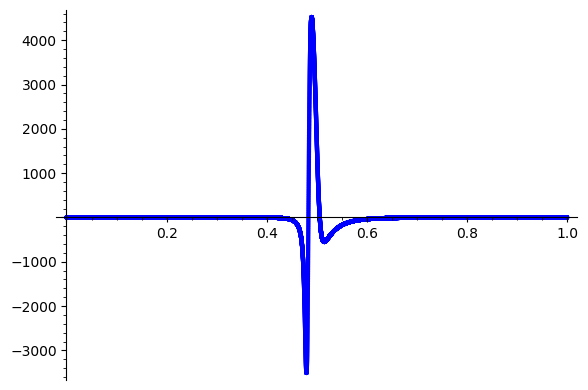

In [12]:
list_plot(t_fy)

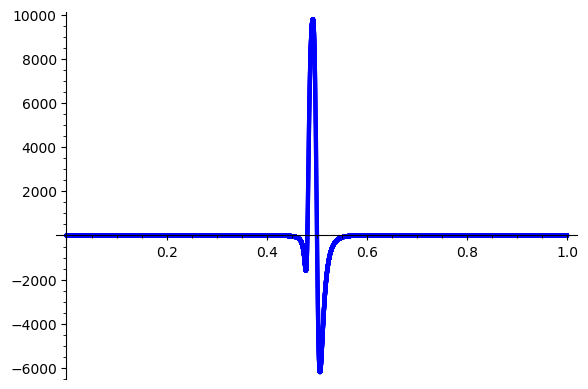

In [13]:
list_plot(t_f_alpha_l)

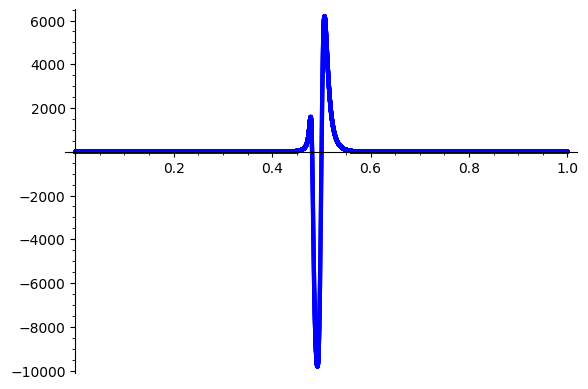

In [14]:
list_plot(t_f_alpha_r)

In [25]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

1.5454615945290453763e-09

In [26]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

7.255947806677282613

In [31]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
# суть работа в тещение одного периода, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
sum_A_alpha_l = 0
dl_alpha = dt * get_omega_d(v_c) * get_R_l()
for (t_i, f) in t_f_alpha_l:
    sum_A_alpha_l += f * dl_alpha
sum_A_alpha_l

107.65475638723963308

In [33]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду отнесённая к периоду
# суть мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной

sum_A_alpha_l / T

505439472744.9747164

In [34]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False)[0], 0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(1.5434003414576375e-09, 7.439761180265369e-09)

In [38]:
# интеграл угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False)[1], 0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(3.65633822237779e-09, 1.1346453907483694e-08)

In [41]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённый к периоду
# мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
ans[0]/T * get_omega_d(v_c) * get_R_l()

506405130353.68152082

In [43]:
t_fy = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=2, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i,
                        omega = get_omega_d(v_c), to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans[0])]

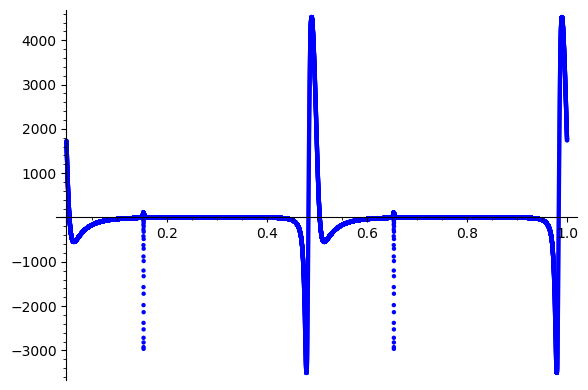

In [44]:
list_plot(t_fy)

In [45]:
# интегральная сумма силы по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

3.0691798704196936952e-09

In [46]:
# интегральная сумма силы по периоду отнесённая к периоду
sum_fy / T

14.409810653273600036

In [47]:
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=2, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False)[0], 0, T)
ans

(3.315037007951764e-09, 1.3349440403136124e-08)

In [48]:
# интеграл силы по периоду отнесённый к периоду
ans[0]/T

15.564110808092655856

In [49]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(np.float128(-40), np.float128(+40), 40*2)
ya_linspace = np.linspace(np.float128(-40), np.float128(+40), 40*2)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t_ = ya_grid * np.nan
rlw_ = ya_grid * np.nan
s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan
ay_ = ya_grid * np.nan
am_ = ya_grid * np.nan
an_ = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max

t_cur = 7.5
q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        R = R_lw(Xa, Ya, Za, t_cur, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        rlw_[iy][ix] = R

        #(E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_cur, q)
        # The Poynting vector S is defined as to be equal
        # to the cross product (1/μ)E × B
        #S_x = E_y * B_z - E_z * B_y
        #S_y = E_z * B_x - E_x * B_z
        #S_z = E_x * B_y - E_y * B_x
        #sx_[iy][ix] = S_x
        #sy_[iy][ix] = S_y
        #sz_[iy][ix] = S_z
        
        (Al_x, Al_y, Al_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        (Ar_x, Ar_y, Ar_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega_d(v_c), alpha=0)
        ax_[iy][ix] = Al_x + Ar_x
        ay_[iy][ix] = Al_y + Ar_y
        am_[iy][ix] = sqrt((Al_x + Ar_x)^2 + (Al_y + Ar_y)^2)
        an_[iy][ix] = atan2((Al_y + Ar_y),(Al_x + Ar_x))

        #if sx_min > S_x:
        #    sx_min = S_x
        #if sx_max < S_x:
        #    sx_max = S_x        

        #if sy_min > S_y:
        #    sy_min = S_y
        #if sy_max < S_y:
        #    sy_max = S_y


        #u_[iy][ix] = E_x
        #v_[iy][ix] = E_y
        #e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        #t2 = t_lag(Xa, Ya, 0, t_cur)
        #t_[iy][ix] = t2


        phi_r = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        phi_l = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega_d(v_c), alpha=0)
        s_[iy][ix] = phi_r+phi_l
        #bz_[iy][ix] = B_z
        #if bz_min > B_z:
        #    bz_min = B_z
        #if bz_max < B_z:
        #    bz_max = B_z

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


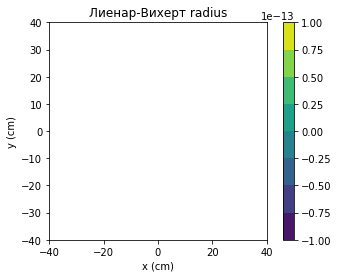

In [50]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, rlw_, levels = np.linspace(0, 32, 32/1+1))
cp = ax.contourf(xa_grid,ya_grid, rlw_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Лиенар-Вихерт radius')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

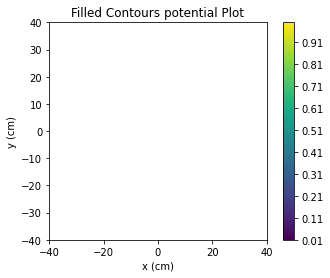

In [51]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, s_, levels = np.linspace(0.01, 1, int((1-0.01)/0.01+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours potential Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

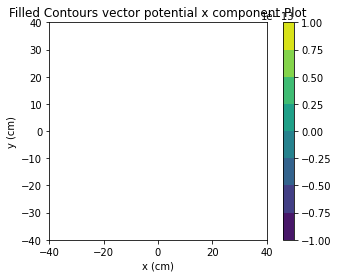

In [52]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, ax_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential x component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

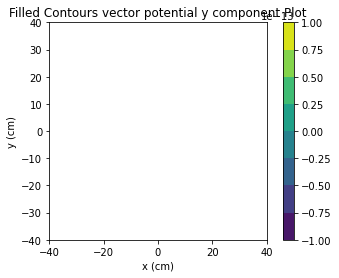

In [53]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, ay_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential y component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

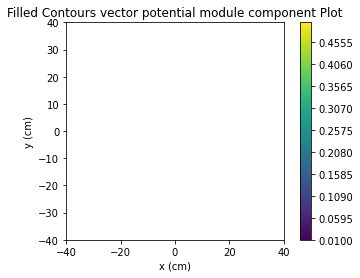

In [54]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, am_, levels = np.linspace(0.01, 0.5, int((1-0.01)/0.01+1)))
#cp = ax.contourf(xa_grid,ya_grid, am_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential module component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

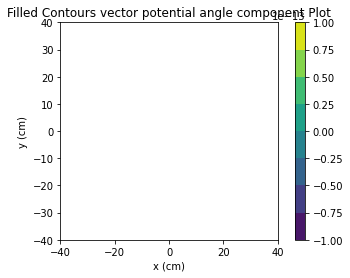

In [55]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, an_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, an_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential angle component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

In [56]:
# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
spherical_calc_Maxwells_stress_tensor = lambda r, theta, varphi, t : \
    calc_Maxwells_stress_tensor(X_a = r*sin(theta)*cos(varphi),
                                Y_a = r*cos(theta),
                                Z_a = r*sin(theta)*sin(varphi),
                                t_i = t,
                                N = 1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(),
                                cos_nx = - sin(theta)*cos(varphi),
                                cos_ny = - cos(theta),
                                cos_nz = - sin(theta)*sin(varphi),
                                omega = get_omega_d(v_c))

# направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

In [57]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R = 40 * get_R_l() + 20 * get_S()
R, R^2

(40.1, 1608.0100000000002)

In [58]:
spherical_calc_Maxwells_stress_tensor_R_t = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [59]:
stress_tensor_upper_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts)
#          theta     varphi

In [60]:
stress_tensor_down_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts)
#          theta     varphi

In [61]:
stress_tensor_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts)
#          theta     varphi

In [62]:
T = np.float128(2*pi)/get_omega_d(v_c) # период вращения
time_steps_number = 360                # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [63]:
t_py = []
t_py_up = []
t_py_dw = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans_up = stress_tensor_down_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_up)
    ans_dw = stress_tensor_upper_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_dw)
    print(i, (i/time_steps_number).n(), t_i, ans_up[0]+ans_dw[0])
    t_py_up += [(i/time_steps_number, ans_up[0])]
    t_py_dw += [(i/time_steps_number, ans_dw[0])]
    t_py += [(i/time_steps_number, ans_up[0]+ans_dw[0])]

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0 0.000000000000000 0.0 (906.151640860101, 0.00022805246068855031)
0 0.000000000000000 0.0 (-0.60505854296905, 1.4037160595138286e-07)
0 0.000000000000000 0.0 905.546582317132
1 0.00277777777777778 5.9164550077678459823e-13 (928.7594389384124, 0.0002359785441756844)
1 0.00277777777777778 5.9164550077678459823e-13 (-0.592309453569237, 1.4022105263317484e-07)
1 0.00277777777777778 5.9164550077678459823e-13 928.1671294848431
2 0.00555555555555556 1.1832910015535691965e-12 (951.7009227412926, 0.00020051562420545215)
2 0.00555555555555556 1.1832910015535691965e-12 (-0.5800901833520874, 1.42355217577696e-07)
2 0.00555555555555556 1.1832910015535691965e-12 951.1208325579405
3 0.00833333333333333 1.7749365023303537948e-12 (974.9858361031668, 0.00018687250828008928)
3 0.00833333333333333 1.7749365023303537948e-12 (-0.5683723687755654, 1.404075659081795e-07)
3 0.00833333333333333 1.7749365023303537948e-12 974.4174637343912
4 0.0111111111111111 2.366582003107138393e-12 (998.6241317507502, 0.00019

33 0.0916666666666667 1.9524301525633891741e-11 (1896.7738426097246, 0.00026068795220532577)
33 0.0916666666666667 1.9524301525633891741e-11 (-0.3611097282794431, 1.3175997578687706e-07)
33 0.0916666666666667 1.9524301525633891741e-11 1896.4127328814452
34 0.0944444444444444 2.011594702641067634e-11 (1937.9097892452185, 0.0003178457034532403)
34 0.0944444444444444 2.011594702641067634e-11 (-0.35719380012095525, 1.1529230036369702e-07)
34 0.0944444444444444 2.011594702641067634e-11 1937.5525954450975
35 0.0972222222222222 2.0707592527187460938e-11 (1979.9936796293944, 0.0002895090737423389)
35 0.0972222222222222 2.0707592527187460938e-11 (-0.35339890693126225, 8.977294591141831e-08)
35 0.0972222222222222 2.0707592527187460938e-11 1979.640280722463
36 0.100000000000000 2.1299238027964245536e-11 (2023.0633809473418, 0.00028852740323254936)
36 0.100000000000000 2.1299238027964245536e-11 (-0.34972089232522663, 1.3834758367904277e-07)
36 0.100000000000000 2.1299238027964245536e-11 2022.71366

66 0.183333333333333 3.9048603051267783483e-11 (4110.147990972459, 0.0005853566589300963)
66 0.183333333333333 3.9048603051267783483e-11 (-0.2793503079426483, 2.9948886509645334e-08)
66 0.183333333333333 3.9048603051267783483e-11 4109.8686406645165
67 0.186111111111111 3.964024855204456808e-11 (4226.45464119871, 0.00038991395206537573)
67 0.186111111111111 3.964024855204456808e-11 (-0.278010541991258, 2.343860669339336e-08)
67 0.186111111111111 3.964024855204456808e-11 4226.176630656719
68 0.188888888888889 4.023189405282135268e-11 (4348.150129984101, 0.0003316050578125347)
68 0.188888888888889 4.023189405282135268e-11 (-0.27672224491294406, 2.840104536689098e-08)
68 0.188888888888889 4.023189405282135268e-11 4347.873407739188
69 0.191666666666667 4.082353955359813728e-11 (4475.642752140385, 0.00026637042083166307)
69 0.191666666666667 4.082353955359813728e-11 (-0.27548459074704035, 3.718174484945411e-08)
69 0.191666666666667 4.082353955359813728e-11 4475.367267549638
70 0.194444444444

99 0.275000000000000 5.8572904576901675225e-11 (-0.2570682637918592, 1.0898563093134744e-07)
99 0.275000000000000 5.8572904576901675225e-11 20325.168541630486
100 0.277777777777778 5.9164550077678459823e-11 (23000.35588675157, 0.00245091438306555)
100 0.277777777777778 5.9164550077678459823e-11 (-0.2569649156687523, 1.3811267898584604e-07)
100 0.277777777777778 5.9164550077678459823e-11 23000.098921835903
101 0.280555555555556 5.975619557845524442e-11 (26664.85976022025, 0.002565924644295868)
101 0.280555555555556 5.975619557845524442e-11 (-0.2568974992448919, 7.67570690643492e-08)
101 0.280555555555556 5.975619557845524442e-11 26664.602862721003
102 0.283333333333333 6.034784107923202902e-11 (32241.093131253532, 0.005374709347225748)
102 0.283333333333333 6.034784107923202902e-11 (-0.2568672698972168, 1.1620734467992161e-07)
102 0.283333333333333 6.034784107923202902e-11 32240.836263983634
103 0.286111111111111 6.0939486580008813617e-11 (43001.7505909749, 0.0045515445370893914)
103 0.

132 0.366666666666667 7.8097206102535566965e-11 (-0.2752693902915697, 2.9631680167175135e-08)
132 0.366666666666667 7.8097206102535566965e-11 5179.553820768667
133 0.369444444444444 7.868885160331235156e-11 (5003.682640147255, 0.0004021101544822159)
133 0.369444444444444 7.868885160331235156e-11 (-0.2765302940617958, 1.6143930744464265e-08)
133 0.369444444444444 7.868885160331235156e-11 5003.406109853194
134 0.372222222222222 7.928049710408913616e-11 (4837.152672889141, 0.0006515171365033545)
134 0.372222222222222 7.928049710408913616e-11 (-0.2778381642493849, 2.438860743757356e-08)
134 0.372222222222222 7.928049710408913616e-11 4836.874834724892
135 0.375000000000000 7.987214260486592076e-11 (4679.44872822544, 0.0003411520319292049)
135 0.375000000000000 7.987214260486592076e-11 (-0.2791940942645884, 3.985846090760417e-08)
135 0.375000000000000 7.987214260486592076e-11 4679.169534131176
136 0.377777777777778 8.046378810564270536e-11 (4529.864681536387, 0.0004210579637176082)
136 0.377

165 0.458333333333333 9.762150762816945871e-11 (-0.34952995061556746, 1.3450949805607851e-07)
165 0.458333333333333 9.762150762816945871e-11 2078.158250747122
166 0.461111111111111 9.821315312894624331e-11 (2029.2508170910949, 0.0003197251970163961)
166 0.461111111111111 9.821315312894624331e-11 (-0.35320223327995975, 1.1472027721316981e-07)
166 0.461111111111111 9.821315312894624331e-11 2028.897614857815
167 0.463888888888889 9.8804798629723027907e-11 (1981.2921382249463, 0.0002509700871542002)
167 0.463888888888889 9.8804798629723027907e-11 (-0.35699145895682227, 1.288673739999479e-07)
167 0.463888888888889 9.8804798629723027907e-11 1980.9351467659894
168 0.466666666666667 9.9396444130499812504e-11 (1934.5771868204265, 0.00026724938227286506)
168 0.466666666666667 9.9396444130499812504e-11 (-0.3609014258736587, 1.3909345147023826e-07)
168 0.466666666666667 9.9396444130499812504e-11 1934.2162853945529
169 0.469444444444444 9.99880896312765971e-11 (1889.054537365821, 0.0001887195529828

198 0.550000000000000 1.1714580915380335045e-10 (931.3469529333446, 0.00020995340857579703)
198 0.550000000000000 1.1714580915380335045e-10 (-0.5679440017736067, 1.3621174941072788e-07)
198 0.550000000000000 1.1714580915380335045e-10 930.779008931571
199 0.552777777777778 1.1773745465458013504e-10 (907.1410207238179, 0.00018239510361528488)
199 0.552777777777778 1.1773745465458013504e-10 (-0.5796574898791309, 1.4717169479272087e-07)
199 0.552777777777778 1.1773745465458013504e-10 906.5613632339388
200 0.555555555555556 1.1832910015535691965e-10 (883.3514576848502, 0.0001874091838977632)
200 0.555555555555556 1.1832910015535691965e-10 (-0.5918729308142551, 1.4881600795105886e-07)
200 0.555555555555556 1.1832910015535691965e-10 882.7595847540359
201 0.558333333333333 1.1892074565613370425e-10 (859.9660548653758, 0.00019812073718340582)
201 0.558333333333333 1.1892074565613370425e-10 (-0.6046197607686775, 1.4031853995224762e-07)
201 0.558333333333333 1.1892074565613370425e-10 859.36143510

231 0.641666666666667 1.366701106794372422e-10 (288.52702357930343, 0.00011387347024945525)
231 0.641666666666667 1.366701106794372422e-10 (-1.597952190711223, 1.6514250396798947e-07)
231 0.641666666666667 1.366701106794372422e-10 286.9290713885922
232 0.644444444444444 1.3726175618021402679e-10 (271.5239640868053, 7.469011990224317e-05)
232 0.644444444444444 1.3726175618021402679e-10 (-1.683195442270797, 1.483038960110548e-07)
232 0.644444444444444 1.3726175618021402679e-10 269.8407686445345
233 0.647222222222222 1.3785340168099081139e-10 (254.4365301505798, 8.836119877683914e-05)
233 0.647222222222222 1.3785340168099081139e-10 (-1.777516015518575, 1.4788050508441933e-07)
233 0.647222222222222 1.3785340168099081139e-10 252.65901413506123
234 0.650000000000000 1.3844504718176759598e-10 (237.23117531200816, 6.15717316884378e-05)
234 0.650000000000000 1.3844504718176759598e-10 (-1.8825198759801443, 1.5236469173223155e-07)
234 0.650000000000000 1.3844504718176759598e-10 235.34865543602803

264 0.733333333333333 1.5619441220507113393e-10 (0.37066781468858767, 1.408346831259734e-07)
264 0.733333333333333 1.5619441220507113393e-10 (-972.1130624638122, 0.00024273006519070556)
264 0.733333333333333 1.5619441220507113393e-10 -971.7423946491236
265 0.736111111111111 1.5678605770584791853e-10 (0.3676763612104738, 1.368594491617819e-07)
265 0.736111111111111 1.5678605770584791853e-10 (-1110.2097566615096, 0.0002868770808676283)
265 0.736111111111111 1.5678605770584791853e-10 -1109.8420803002991
266 0.738888888888889 1.5737770320662470313e-10 (0.3649513503436329, 1.3452170144599503e-07)
266 0.738888888888889 1.5737770320662470313e-10 (-1272.016676701877, 0.0003082427773515577)
266 0.738888888888889 1.5737770320662470313e-10 -1271.6517253515333
267 0.741666666666667 1.5796934870740148773e-10 (0.3624715942395784, 1.4429846005995878e-07)
267 0.741666666666667 1.5796934870740148773e-10 (-1463.5371869614064, 0.0003595567526320971)
267 0.741666666666667 1.5796934870740148773e-10 -1463.1

297 0.825000000000000 1.7571871373070502568e-10 (0.3674959953296245, 1.4028489382114955e-07)
297 0.825000000000000 1.7571871373070502568e-10 (-1047.2209374975425, 0.0002536251816698254)
297 0.825000000000000 1.7571871373070502568e-10 -1046.853441502213
298 0.827777777777778 1.7631035923148181027e-10 (0.37060083094240326, 1.4259180651094027e-07)
298 0.827777777777778 1.7631035923148181027e-10 (-913.9319447918668, 0.0001793282647772898)
298 0.827777777777778 1.7631035923148181027e-10 -913.5613439609244
299 0.830555555555556 1.7690200473225859487e-10 (0.3740302121021863, 1.2258118022733117e-07)
299 0.830555555555556 1.7690200473225859487e-10 (-798.5189373098265, 0.00017546561360520796)
299 0.830555555555556 1.7690200473225859487e-10 -798.1449070977243
300 0.833333333333333 1.7749365023303537948e-10 (0.37782170103322543, 1.1365981728097067e-07)
300 0.833333333333333 1.7749365023303537948e-10 (-697.7887552594985, 0.00018146471910007733)
300 0.833333333333333 1.7749365023303537948e-10 -697.4

330 0.916666666666667 1.9524301525633891742e-10 (333.22646377657475, 7.442689519410531e-05)
330 0.916666666666667 1.9524301525633891742e-10 (-1.5882973629311465, 1.486183093925142e-07)
330 0.916666666666667 1.9524301525633891742e-10 331.6381664136436
331 0.919444444444444 1.9583466075711570201e-10 (350.87869924493464, 7.055083444146293e-05)
331 0.919444444444444 1.9583466075711570201e-10 (-1.5127981596250988, 1.4753000070196018e-07)
331 0.919444444444444 1.9583466075711570201e-10 349.36590108530953
332 0.922222222222222 1.9642630625789248662e-10 (368.46036253286286, 6.618335324212743e-05)
332 0.922222222222222 1.9642630625789248662e-10 (-1.4436442605779256, 1.487488120510477e-07)
332 0.922222222222222 1.9642630625789248662e-10 367.01671827228495
333 0.925000000000000 1.9701795175866927121e-10 (385.99897705145776, 9.418517833079077e-05)
333 0.925000000000000 1.9701795175866927121e-10 (-1.380074323726978, 1.45083964740203e-07)
333 0.925000000000000 1.9701795175866927121e-10 384.618902727

In [ ]:
list_plot(t_py)

In [ ]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_py = 0
for (t_i, py) in t_py:
    sum_py += py * dt
sum_py

In [ ]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_py / T

In [ ]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_py_up = 0
for (t_i, py) in t_py_up:
    sum_py_up += py * dt
sum_py_up

In [ ]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_py_up / T

In [ ]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_py_dw = 0
for (t_i, py) in t_py_dw:
    sum_py_dw += py * dt
sum_py_dw

In [ ]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_py_dw / T

In [ ]:
spherical_calc_Maxwells_stress_tensor_R = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [ ]:
# "upper\\,half\\,sphere"

Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere

In [ ]:
# "down\\,half\\,sphere"

Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere + Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.
# (9.719863017691997e-09, 8.512745300763309e-05)

In [ ]:
calc_sum_Fy_t(N=1, S=S, R_l=R_l, R_r=R_r, t_i = 1)